# IMPLEMENTATION DES DIFFERENTS ALGORITHMES 

 J'utilise une approche objet : chaque morceau sera une classe, et des instances (des objets) seront utilisées pour toutes les composantes.

In [4]:
import numpy as np

class UCB1 :
    """we create a new type of object called UCB1 with 
    Attributes:
    _ _ _ _ _ _  
    n_arms:int the number of arms"""
    def __init__(self, n_arms):
        self.n_arms = n_arms  # numbers of arms
        self.counts = np.zeros(n_arms) # for any arms we store  the number of time that it was played in this numpy table initialize by full zeros
        self.values = np.zeros(n_arms) # we also done that for store the average for all arms
        self.total_counts = 0 # for store the moment t step by step

    def select_arm(self):

        """This methode return the maximum value of the upper bound cumullative"""
        if self.total_counts < self.n_arms:
            #chaque bras est joué une fois: c'est le tir initial
            return self.total_counts
        else:
            UCB1_values = self.values + np.sqrt(2 * np.log(self.total_counts) / self.counts)
            return np.argmax(UCB1_values)    

    def update(self, chosen_arm, reward):
        """ this methode is used to update our algorithm it is an recursive methode
        intput:
                - chosen_arm : is the arm considered as chosen
                - reward is the reward ontained through the choise  of the  arm called chosen_arm  """

        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n-1)/n)*value + (1/n)*reward #  il s'agit de la mise a jour de la moyenne empirique
        self.values[chosen_arm] = new_value

    




## Simulation de l'algorithme UCB 1

Nous souhaitons maintenant implémenter l’algorithme UCB1 et générer des graphes de regret, en considérant des récompenses de type Bernoulli. Pour cela, nous considérons le cas de K=2 bras, c’est-à-dire deux sources de récompenses aléatoires :

Le premier bras génère des observations issues d’une variable aléatoire 𝑋∼Bernoulli(1/3), Le second bras génère des observations(recompenses) issues d’une variable aléatoire Y∼Bernoulli(1/4) 

Recompense moyenne: 0.3253333333333333
Bras sélectionnés: [27944.  2056.]


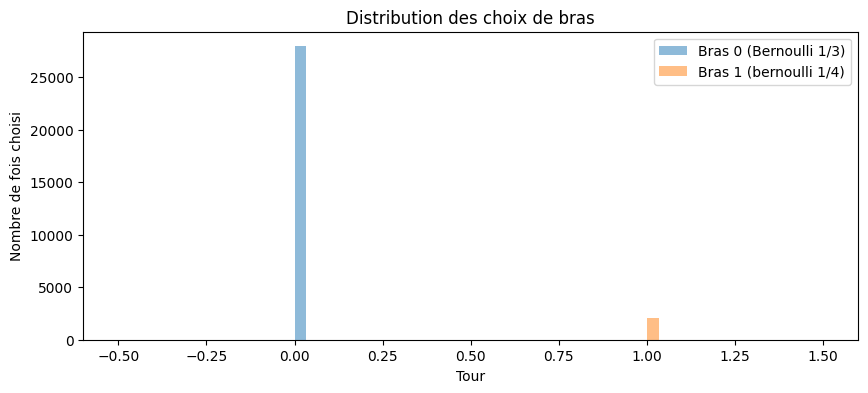

In [ ]:
import matplotlib.pyplot as plt


def distribution_reward(arm, p_1, p_2):
        if arm == 0:
            reward = np.random.binomial(1, p_1) # une bernoulli
        elif arm == 1:
            reward = np.random.binomial(1, p_2 ) # une bernoulli est une binomial 1
        else:
            raise ValueError(f"Arm {arm} invalide. Il faut que arm == 0 1.")
        return reward

def regret (expected_means, algo,n ):
    # regret
    tru_regret = max(expected_means) * n - np.sum(np.dot(expected_means, algo.counts))
    return tru_regret

n_rounds = 30000
algo = UCB1(n_arms=2)
rewards = []
chosen_arms = []
# Espérances des bras (estimées théoriquement)
expected_means = [1/3, 1/4]  
#mu_star = max(mu)
regrets_tru = [] 

#simulation
for t in range(1, n_rounds+1):
    arm = algo.select_arm()
    p_1 = 1/3
    P_2 = 1/4
    reward = distribution_reward(arm, p_1, P_2)
    algo.update(arm, reward)
    rewards.append(reward)
    chosen_arms.append(arm)
    tru_regret = regret(expected_means, algo, t)    
    regrets_tru.append(tru_regret)    
     
# on montre les resultats

print("Recompense moyenne:", np.mean(rewards))
print("Bras sélectionnés:", algo.counts)



# Visualisation
plt.figure(figsize=(10,4))
plt.hist([a for i, a in enumerate(chosen_arms) if a == 0], bins=30, alpha=0.5, label="Bras 0 (Bernoulli 1/3)")
plt.hist([a for i, a in enumerate(chosen_arms) if a == 1], bins=30, alpha=0.5, label="Bras 1 (bernoulli 1/4)")
plt.legend()
plt.title("Distribution des choix de bras")
plt.xlabel("Tour")
plt.ylabel("Nombre de fois choisi")
plt.show()

Le bras en bleu est le plus souvent choisit, ce qui concorde bien avec l'intuition car elle a une probabilité plus élevé comme paramètre

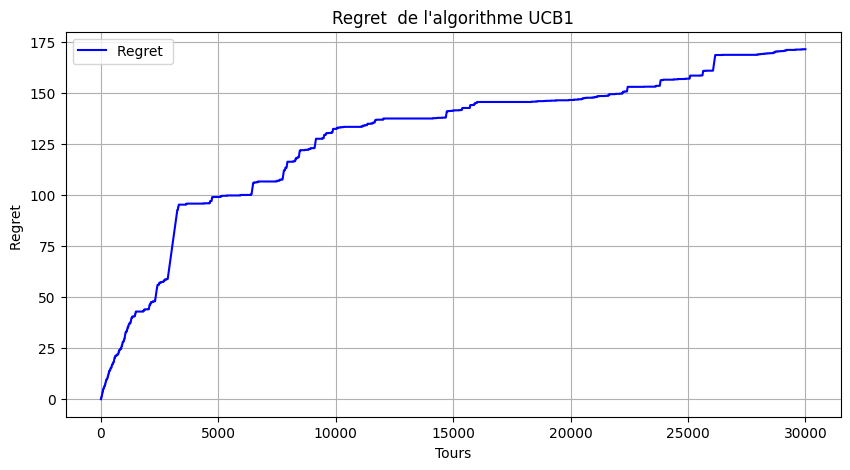

In [6]:
# Affichage : courbes de regret
plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret ", color='blue')

plt.xlabel("Tours")
plt.legend()
plt.ylabel("Regret ")
plt.title("Regret  de l'algorithme UCB1")
plt.grid(True)
plt.show()

 Définition :   On définit le regret cumulé après t  tours  comme :
    $
    R(t) = t\mu^* - \sum_{i=1}^K \mu_i\mathbb{E}[T_{i}(t)]
    $
    où $ \mu^* = \max_{i=1,\dots,K} \mu_i $ est la récompense moyenne maximale et $ T_{i}(t) $ est le nombre de fois que  le bras i a éte choisit parmis les $ t $ tours ainsi jusqu'a n.

Il mesure ce qu’on a perdu en ne jouant pas toujours le meilleur bras.

La courbe est croissante, mais de plus en plus plate

Si le regret est plat, ça veut dire que l’algorithme a appris le bon bras.

Si le regret continue à augmenter vite, l'algorithme n'apprend pas bien.

### MAJORATION THEORIQUE DU REGRET CUMULE

On implemente une majoration du regret cumulé pour voir a quel poin cette majoration s'eloigne du regret pour ce la on utilise la majoration theorique donnée par peter et aur dans leurs article qui est donne par :

$$
R(n) \leq \sum_{i:\Delta_i > 0} \left( \frac{8 \log n}{\Delta_i} + \left(1 + \frac{\pi^2}{3} \right) \Delta_i \right)
$$


####  Implementation

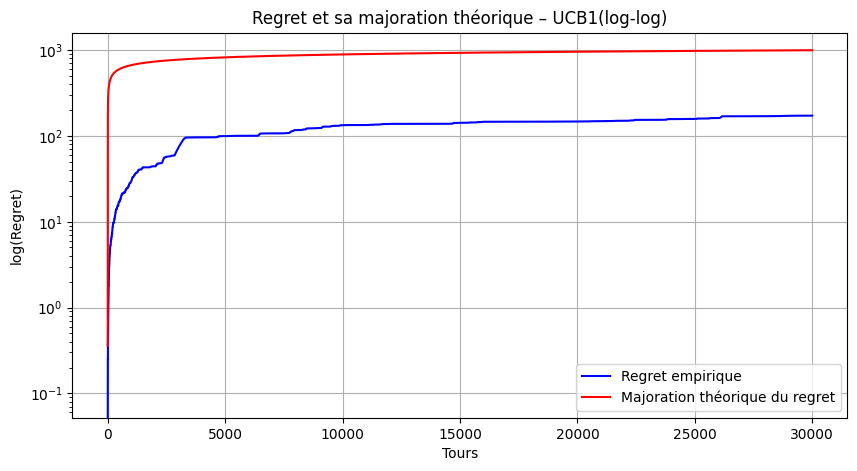

In [7]:
delta = [1/3- 1/4, 0.0]
th_bound = []

for t in range(1, n_rounds + 1):  # commencer à t=1 pour éviter log(0)
    bound = 0
    for d in delta:
        if d > 0:
            bound += (8 * np.log(t)) / d + (1 + np.pi ** 2 / 3) * d
    th_bound.append(bound)       

plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret empirique", color='blue')
plt.plot(th_bound, label="Majoration théorique du regret", color="red")
plt.yscale("log")

plt.xlabel("Tours")
plt.ylabel("log(Regret)")
plt.title("Regret et sa majoration théorique – UCB1(log-log)")
plt.legend()
plt.grid(True)
plt.show()




On souhaite maintenant appliquer cette politique toujours sur deux bras mais avec des parametres differents soit donc les bras suivants:

(0.9, 0.6), (0.9, 0.8), (1/3, 1/4), (0.55, 0.45)  on trace donc le graphes de regret 

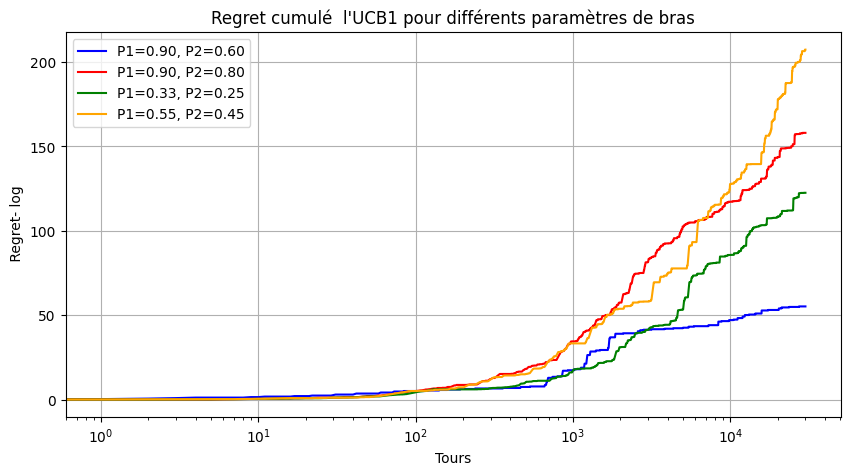

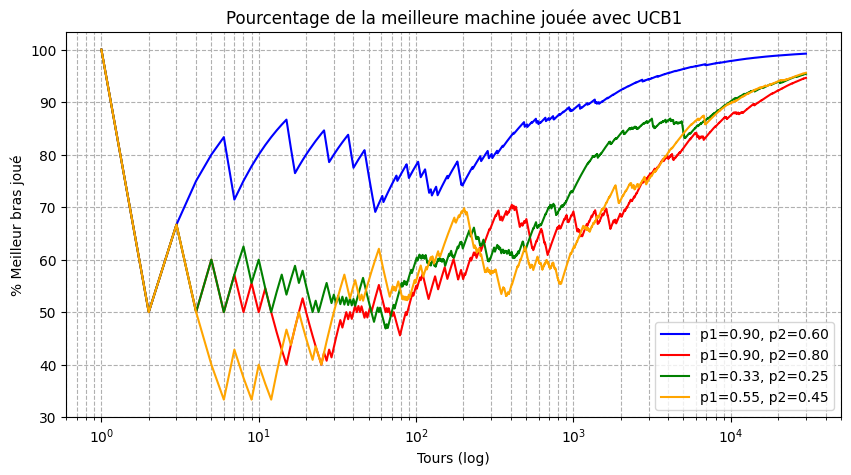

In [8]:
folowing_parameters = [(0.9, 0.6), (0.9, 0.8), (1/3, 1/4), (0.55, 0.45)]
colors = ["blue", "red", "green", "orange"]

plt.figure(figsize=(10, 5))

for idx, (P1, P2) in enumerate(folowing_parameters):
    algo = UCB1(n_arms=2)
    rewards = []
    chosen_arms = []
    regrets_tru = []
    expected_means = [P1, P2]

    for t in range(1, n_rounds + 1):
        arm = algo.select_arm()
        reward = distribution_reward(arm, P1, P2)
        algo.update(arm, reward)
        rewards.append(reward)
        chosen_arms.append(arm)
        tru_regret = regret(expected_means, algo, t)
        regrets_tru.append(tru_regret)

    # Tracé du log du regret
    plt.plot(regrets_tru, label=f"P1={P1:.2f}, P2={P2:.2f}", color=colors[idx])
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Tours")
plt.ylabel(" Regret- log")
plt.title("Regret cumulé  l'UCB1 pour différents paramètres de bras")
plt.legend()
plt.grid(True)
plt.show()



## Courbe du pourcentage du meilleur bras joué
plt.figure(figsize=(10, 5))

for idx, (p1, p2) in enumerate(folowing_parameters):
    algo = UCB1(n_arms=2)
    chosen_arms = []
    best_arm = 0 if p1 >= p2 else 1
    best_arm_counts = []

    for t in range(1, n_rounds + 1):
        arm = algo.select_arm()
        reward = distribution_reward(arm, p1, p2)
        algo.update(arm, reward)
        chosen_arms.append(arm)

        best_arm_count = chosen_arms.count(best_arm)
        best_arm_counts.append(100 * best_arm_count / t)

    plt.plot(range(1, n_rounds + 1), best_arm_counts, 
             label=f"p1={p1:.2f}, p2={p2:.2f}", color=colors[idx])

plt.xscale('log')
plt.xlabel("Tours (log)")
plt.ylabel("% Meilleur bras joué")
plt.title("Pourcentage de la meilleure machine jouée avec UCB1")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()
    


- le premier graphique:  les différentes courbes de regrets pour les paramètres énoncés, tracées avec une échelle log en abscisse
    
    On remarque que pour tous les paramètres on a les mêmes tendances de croissances, le fait d'appliquer un échelle logarithmique a l'axe des abscisses nous permet d'observer un sub-linéarité qui prouve que la croissance est logarithmique

- Le deuxième graphique représente pour un nombre de tours jouer le pourcentage d'avoir joué le bras

     - on remarque que pour tous les paramètres on a presque les mêmes tendances ce qui prouve que l'algorithme apprend  correctement  

# Implementation de l'algorithme ETC

Ici on dispose toujours de K bras, a la seul difference que l'on procède  en deux etapes:

- On explore chaques bras m fois et on calcule pour chaque bras la moyenne empirique des recompences 
- puis on prend le bras avec la plus grande  moyenne empirique

Ansi le bras $A_t$ choisit est :

$$
    A_t = argmax_i \hat{\mu_i}(mk)

$$   

Pour des raisons de non redondance, on va creer un classe fille qui herite des attribut de la classe UCB 1 

=== CONFIGURATION DE L'EXPÉRIENCE ETC ===
Bras 0: Bernoulli(0.4)
Bras 1: Bernoulli(0.6) - OPTIMAL
Écart (gap): 0.19999999999999996
Horizon: 2000 tours
Simulations Monte Carlo: 200

M optimal théorique: 57

=== SIMULATIONS MONTE CARLO ===
Testing m = 5...
m=5: Commit au bras 0 au temps 11 avec moyennes [0.4 0.4]
m=5: Commit au bras 1 au temps 11 avec moyennes [0.2 0.6]
m=5: Commit au bras 1 au temps 11 avec moyennes [0.4 0.8]
m=5: Commit au bras 0 au temps 11 avec moyennes [0.6 0.6]
m=5: Commit au bras 0 au temps 11 avec moyennes [0.6 0.6]
m=5: Commit au bras 0 au temps 11 avec moyennes [0.2 0.2]
m=5: Commit au bras 0 au temps 11 avec moyennes [0.2 0.2]
m=5: Commit au bras 1 au temps 11 avec moyennes [0.4 0.6]
m=5: Commit au bras 1 au temps 11 avec moyennes [0.2 1. ]
m=5: Commit au bras 1 au temps 11 avec moyennes [0.4 0.6]
m=5: Commit au bras 0 au temps 11 avec moyennes [0.6 0.6]
m=5: Commit au bras 0 au temps 11 avec moyennes [0.6 0.4]
m=5: Commit au bras 1 au temps 11 avec moyennes [

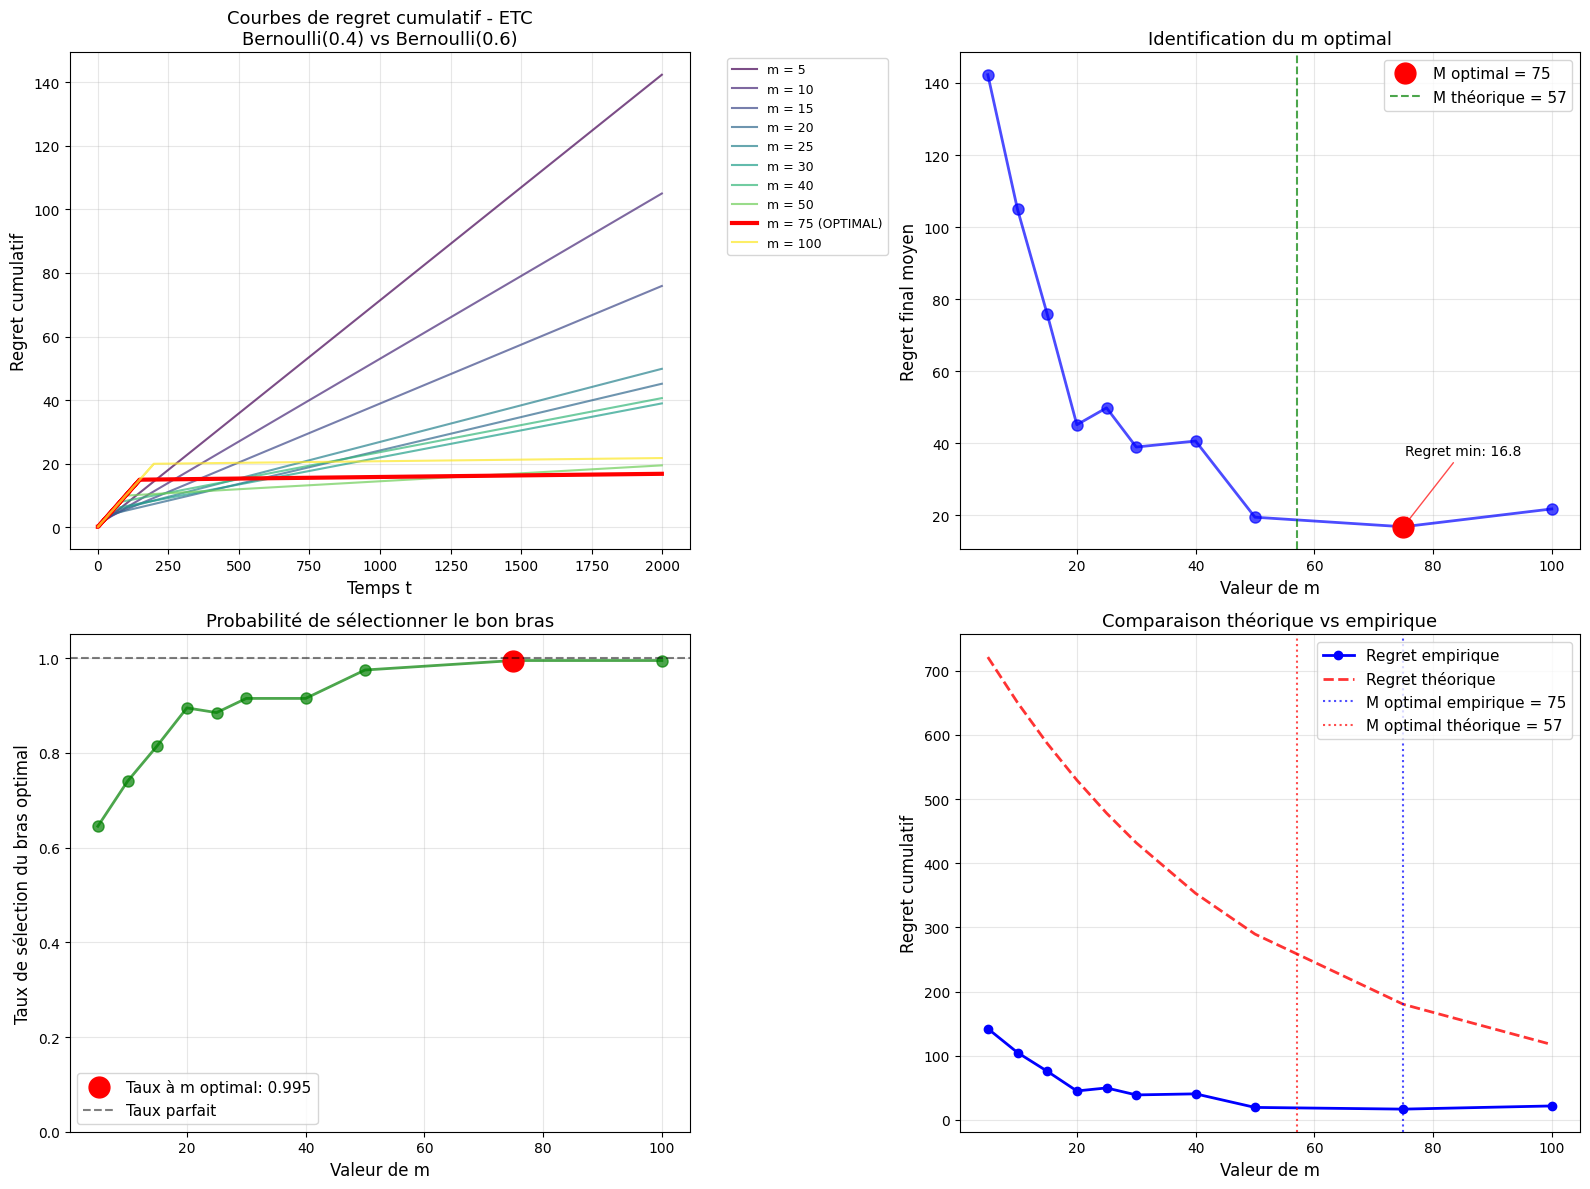


=== ANALYSE DÉTAILLÉE DES RÉSULTATS ===
Configuration: Bernoulli(0.4) vs Bernoulli(0.6)
Écart optimal: 0.19999999999999996
Horizon: 2000 tours

--- Comparaison m optimal ---
M optimal théorique: 57
M optimal empirique: 75
Différence: 18

--- Performance du m optimal ---
Regret final: 16.85
Taux de succès: 0.995

--- Comparaison extrêmes ---
m=5: regret=142.29, succès=0.645
m=100: regret=21.80, succès=0.995

Gain du m optimal vs m minimum: 125.44
Gain du m optimal vs m maximum: 4.95

--- Analyse du compromis exploration-exploitation ---
Coût d'exploration (théorique): 15.00
Perte d'exploitation (estimée): 1.85
Total théorique: 16.85
Regret empirique: 16.85


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

class ETC:
    """Algorithme Explore-Then-Commit corrigé"""
    def __init__(self, m, k=2):
        self.m = m  # Nombre de tirages par bras dans la phase d'exploration
        self.k = k  # Nombre de bras
        self.counts = np.zeros(k)
        self.rewards = np.zeros(k)
        self.t = 0
        self.commit_arm = None
        self.exploration_phase = True

    def select_arm(self):
        self.t += 1
        
        # Phase d'exploration : tirer chaque bras m fois
        if self.t <= self.m * self.k:
            # Correction : assurer une distribution équitable
            return (self.t - 1) % self.k
        else:
            # Phase de commit : choisir le meilleur bras basé sur les moyennes empiriques
            if self.commit_arm is None:
                # Calcul des moyennes empiriques après exploration
                averages = self.rewards / np.maximum(self.counts, 1)  # Éviter division par 0
                self.commit_arm = np.argmax(averages)
                self.exploration_phase = False
                print(f"m={self.m}: Commit au bras {self.commit_arm} au temps {self.t} avec moyennes {averages}")
            return self.commit_arm

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.rewards[chosen_arm] += reward

# Configuration des paramètres
np.random.seed(42)  # Pour la reproductibilité

# Paramètres des bras Bernoulli
p1 = 0.4  # Bras sous-optimal
p2 = 0.6  # Bras optimal
optimal_mean = max(p1, p2)
optimal_arm = np.argmax([p1, p2])
gap = abs(p2 - p1)  # Écart entre les bras

T = 2000  # Horizon temporel
n_simulations = 200  # Nombre de simulations Monte Carlo

print("=== CONFIGURATION DE L'EXPÉRIENCE ETC ===")
print(f"Bras 0: Bernoulli({p1})")
print(f"Bras 1: Bernoulli({p2}) - OPTIMAL")
print(f"Écart (gap): {gap}")
print(f"Horizon: {T} tours")
print(f"Simulations Monte Carlo: {n_simulations}")

def distribution_reward(arm, p1, p2):
    """Fonction de récompense Bernoulli corrigée"""
    p = [p1, p2]
    return np.random.binomial(1, p[arm])

# Valeurs de m à tester
m_values = [5, 10, 15, 20, 25, 30, 40, 50, 75, 100]

# Calcul théorique du m optimal
# Théorie : m_optimal ≈ sqrt(T / (2 * log(T) * gap^2))
m_optimal_theory = int(sqrt(T / (2 * log(T) * gap**2)))
print(f"\nM optimal théorique: {m_optimal_theory}")

# Simulation Monte Carlo pour chaque valeur de m
regret_results = {}
final_regrets = {}
success_rates = {}  # Taux de sélection du bon bras

print(f"\n=== SIMULATIONS MONTE CARLO ===")

for m in m_values:
    print(f"Testing m = {m}...")
    
    all_regrets = []
    final_regrets_list = []
    correct_selections = 0
    
    for sim in range(n_simulations):
        algo = ETC(m=m, k=2)
        regrets = []
        cumulative_regret = 0
        
        for t in range(T):
            arm = algo.select_arm()
            reward = distribution_reward(arm, p1, p2)
            algo.update(arm, reward)
            
            # Calcul du regret instantané
            regret = optimal_mean - (p1 if arm == 0 else p2)
            cumulative_regret += regret
            regrets.append(cumulative_regret)
        
        all_regrets.append(regrets)
        final_regrets_list.append(cumulative_regret)
        
        # Vérifier si le bon bras a été sélectionné
        if algo.commit_arm == optimal_arm:
            correct_selections += 1
    
    # Moyennes des regrets
    regret_results[m] = np.mean(all_regrets, axis=0)
    final_regrets[m] = np.mean(final_regrets_list)
    success_rates[m] = correct_selections / n_simulations
    
    print(f"  m={m}: Regret final moyen = {final_regrets[m]:.2f}, Taux de succès = {success_rates[m]:.3f}")

# Identification du m optimal empirique
m_optimal_empirical = min(final_regrets, key=final_regrets.get)
print(f"\nM optimal empirique: {m_optimal_empirical}")
print(f"Regret minimal: {final_regrets[m_optimal_empirical]:.2f}")

# GRAPHIQUES DÉTAILLÉS
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Graphique 1: Courbes de regret cumulatif
colors = plt.cm.viridis(np.linspace(0, 1, len(m_values)))

for i, (m, regrets) in enumerate(regret_results.items()):
    color = 'red' if m == m_optimal_empirical else colors[i]
    linewidth = 3 if m == m_optimal_empirical else 1.5
    alpha = 1.0 if m == m_optimal_empirical else 0.7
    
    ax1.plot(regrets, label=f"m = {m}" + (" (OPTIMAL)" if m == m_optimal_empirical else ""), 
             color=color, linewidth=linewidth, alpha=alpha)

ax1.set_xlabel("Temps t", fontsize=12)
ax1.set_ylabel("Regret cumulatif", fontsize=12)
ax1.set_title(f"Courbes de regret cumulatif - ETC\nBernoulli({p1}) vs Bernoulli({p2})", fontsize=13)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Graphique 2: Regret final vs m
m_sorted = sorted(m_values)
final_regrets_sorted = [final_regrets[m] for m in m_sorted]

ax2.plot(m_sorted, final_regrets_sorted, 'bo-', linewidth=2, markersize=8, alpha=0.7)
ax2.plot(m_optimal_empirical, final_regrets[m_optimal_empirical], 'ro', 
         markersize=15, label=f'M optimal = {m_optimal_empirical}')
ax2.axvline(x=m_optimal_theory, color='green', linestyle='--', alpha=0.7, 
           label=f'M théorique = {m_optimal_theory}')

ax2.set_xlabel("Valeur de m", fontsize=12)
ax2.set_ylabel("Regret final moyen", fontsize=12)
ax2.set_title("Identification du m optimal", fontsize=13)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

# Annotations
ax2.annotate(f'Regret min: {final_regrets[m_optimal_empirical]:.1f}',
            xy=(m_optimal_empirical, final_regrets[m_optimal_empirical]),
            xytext=(m_optimal_empirical + 10, final_regrets[m_optimal_empirical] + 20),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center')

# Graphique 3: Taux de succès vs m
success_rates_sorted = [success_rates[m] for m in m_sorted]

ax3.plot(m_sorted, success_rates_sorted, 'go-', linewidth=2, markersize=8, alpha=0.7)
ax3.plot(m_optimal_empirical, success_rates[m_optimal_empirical], 'ro', 
         markersize=15, label=f'Taux à m optimal: {success_rates[m_optimal_empirical]:.3f}')
ax3.axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='Taux parfait')

ax3.set_xlabel("Valeur de m", fontsize=12)
ax3.set_ylabel("Taux de sélection du bras optimal", fontsize=12)
ax3.set_title("Probabilité de sélectionner le bon bras", fontsize=13)
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=11)
ax3.set_ylim(0, 1.05)

# Graphique 4: Analyse théorique vs empirique
theoretical_regrets = []
for m in m_sorted:
    # Regret théorique ETC: m * gap + (T - 2*m) * P(erreur) * gap
    # Approximation: P(erreur) ≈ 2 * exp(-m * gap^2 / 2)
    prob_error = 2 * np.exp(-m * gap**2 / 2)
    theoretical_regret = m * gap + (T - 2*m) * prob_error * gap
    theoretical_regrets.append(theoretical_regret)

ax4.plot(m_sorted, final_regrets_sorted, 'bo-', linewidth=2, label='Regret empirique', markersize=6)
ax4.plot(m_sorted, theoretical_regrets, 'r--', linewidth=2, label='Regret théorique', alpha=0.8)
ax4.axvline(x=m_optimal_empirical, color='blue', linestyle=':', alpha=0.7, 
           label=f'M optimal empirique = {m_optimal_empirical}')
ax4.axvline(x=m_optimal_theory, color='red', linestyle=':', alpha=0.7, 
           label=f'M optimal théorique = {m_optimal_theory}')

ax4.set_xlabel("Valeur de m", fontsize=12)
ax4.set_ylabel("Regret cumulatif", fontsize=12)
ax4.set_title("Comparaison théorique vs empirique", fontsize=13)
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=11)

plt.tight_layout()
plt.show()

# ANALYSE DÉTAILLÉE
print(f"\n=== ANALYSE DÉTAILLÉE DES RÉSULTATS ===")
print(f"Configuration: Bernoulli({p1}) vs Bernoulli({p2})")
print(f"Écart optimal: {gap}")
print(f"Horizon: {T} tours")

print(f"\n--- Comparaison m optimal ---")
print(f"M optimal théorique: {m_optimal_theory}")
print(f"M optimal empirique: {m_optimal_empirical}")
print(f"Différence: {abs(m_optimal_theory - m_optimal_empirical)}")

print(f"\n--- Performance du m optimal ---")
print(f"Regret final: {final_regrets[m_optimal_empirical]:.2f}")
print(f"Taux de succès: {success_rates[m_optimal_empirical]:.3f}")

print(f"\n--- Comparaison extrêmes ---")
m_min = min(m_values)
m_max = max(m_values)
print(f"m={m_min}: regret={final_regrets[m_min]:.2f}, succès={success_rates[m_min]:.3f}")
print(f"m={m_max}: regret={final_regrets[m_max]:.2f}, succès={success_rates[m_max]:.3f}")

# Gain par rapport aux extrêmes
gain_vs_min = final_regrets[m_min] - final_regrets[m_optimal_empirical]
gain_vs_max = final_regrets[m_max] - final_regrets[m_optimal_empirical]
print(f"\nGain du m optimal vs m minimum: {gain_vs_min:.2f}")
print(f"Gain du m optimal vs m maximum: {gain_vs_max:.2f}")

print(f"\n--- Analyse du compromis exploration-exploitation ---")
exploration_cost = m_optimal_empirical * gap
exploitation_gain = (T - 2*m_optimal_empirical) * (1 - success_rates[m_optimal_empirical]) * gap
print(f"Coût d'exploration (théorique): {exploration_cost:.2f}")
print(f"Perte d'exploitation (estimée): {exploitation_gain:.2f}")
print(f"Total théorique: {exploration_cost + exploitation_gain:.2f}")
print(f"Regret empirique: {final_regrets[m_optimal_empirical]:.2f}")


Voici les courbes de regret cumulatif pour différentes valeurs de m dans l'algorithme Explore-Then-Commit (ETC) :

Chaque courbe correspond à une valeur différente de 𝑚 ∈ {5,10,20,50,100}. L’horizon total est fixé à T=500.Les probabilités de succès des deux bras sont 
p1 = 0.5, p2 = 0.7 (le bras 2 est optimal).

 - Observations :
Pour de petits m, l’exploration est rapide, donc le regret reste faible si le meilleur bras est identifié correctement. Pour de grands m, l’algorithme explore plus longtemps, ce qui augmente le regret initial. Si l’identification échoue, le regret continue à croître après le commit. Le plateau observé correspond à la phase où l’algorithme s’est engagé sur un bras.

### Remarques et comparaisons


L’algorithme UCB1 est un algorithme adaptatif, qui équilibre automatiquement l’exploration et l’exploitation. À chaque tour, il choisit le bras avec la plus haute borne supérieure de confiance :  

$$
\hat{\mu}_i + \sqrt{\frac{2 \ln t}{N_i}}
$$

Il continue donc d’explorer même tardivement si l’incertitude le justifie. Il ne nécessite aucun paramètre de réglage, ce qui le rend robuste et efficace. Son regret cumulatif est logarithmique en fonction du nombre de tours :  

$$
O(\log T)
$$



À l’inverse, l’algorithme ETC (Explore-Then-Commit) est non adaptatif, car il sépare clairement exploration et exploitation. Il commence par tirer chaque bras un nombre fixe de fois (paramètre \(m\)), puis choisit le bras avec la meilleure moyenne empirique pour le reste des tours.  

Cette approche est très simple à implémenter mais dépend fortement du choix de \(m\) :  
- Si \(m\) est trop petit, l’algorithme risque de choisir le mauvais bras.  
- Si \(m\) est trop grand, il gaspille des tours en exploration inutile.

Son regret est aussi logarithmique si \(m\) est bien calibré, sinon il peut être beaucoup plus élevé.  



En résumé, UCB1 est généralement préféré en pratique pour sa robustesse et sa capacité d’adaptation sans réglage, tandis que ETC est simple mais sensible au paramètre \(m\).


### EPSOLON-GREEDY ALGORITHM 

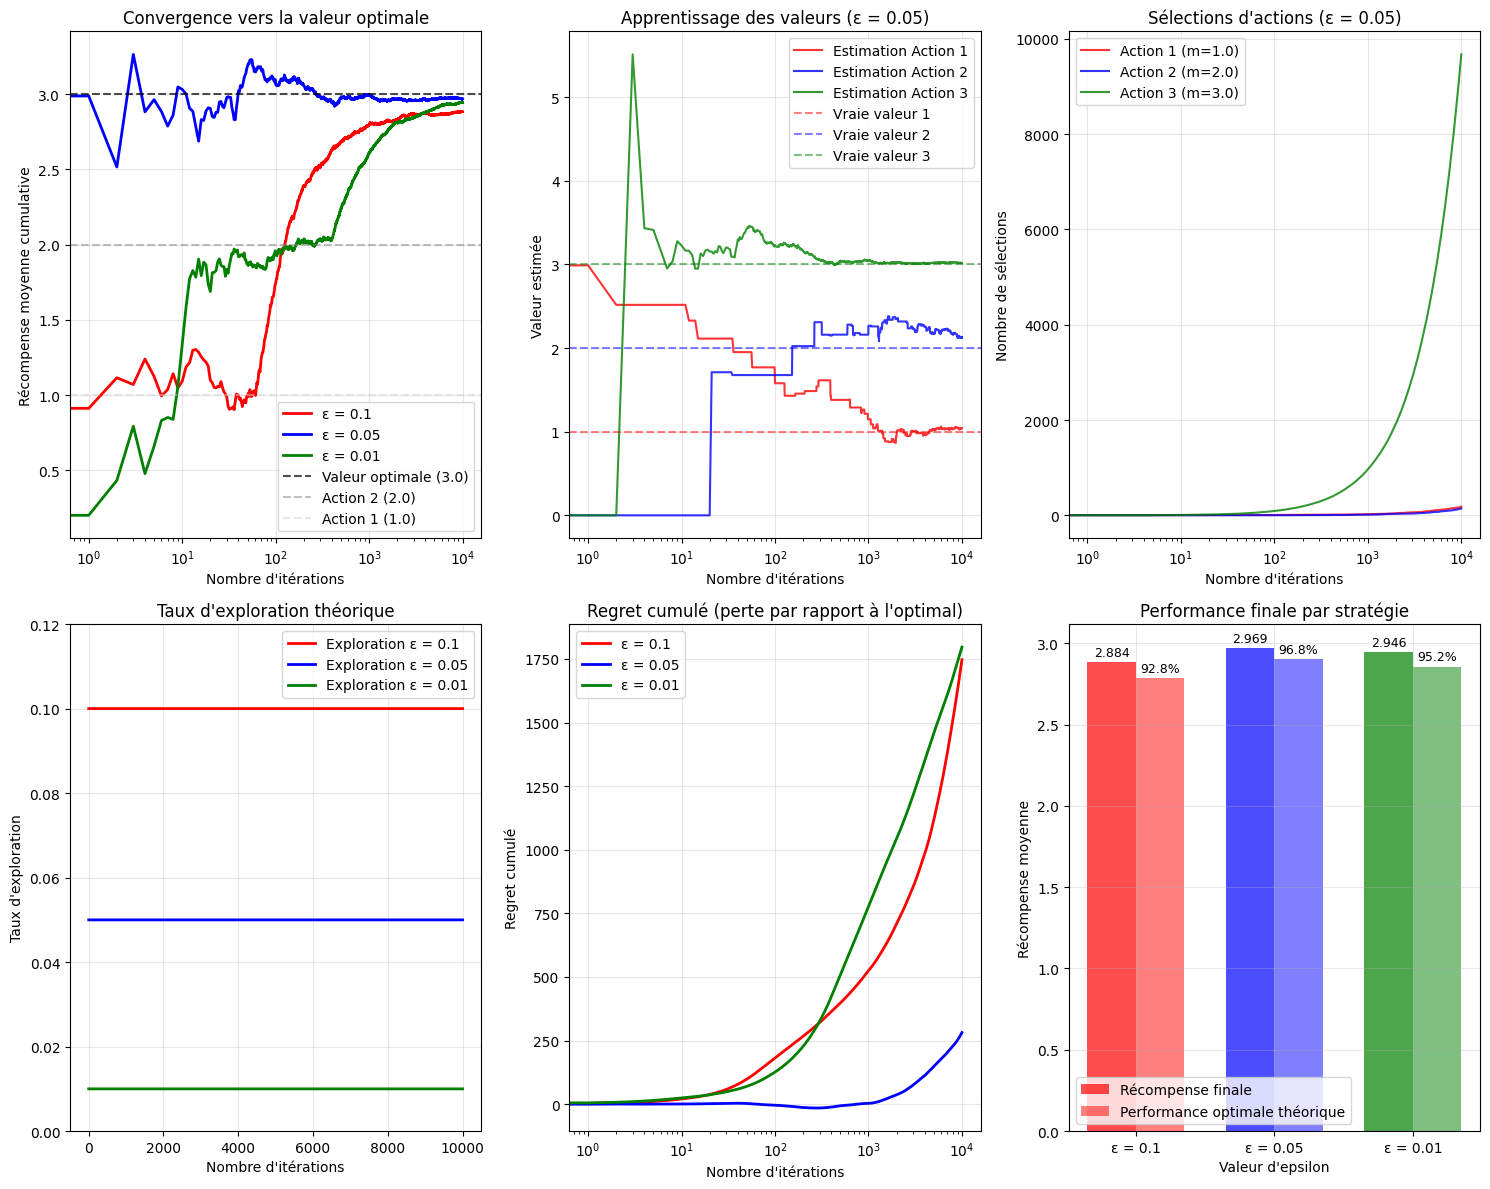

=== RÉSULTATS FINAUX ===
Valeur optimale théorique: 3.0

Epsilon = 0.1:
  Valeurs estimées finales: ['1.073', '1.899', '2.993']
  Nombre de sélections: [373, 342, 9285]
  Récompense moyenne finale: 2.884
  Sélection action optimale: 92.8%

Epsilon = 0.05:
  Valeurs estimées finales: ['1.045', '2.130', '3.017']
  Nombre de sélections: [181, 143, 9676]
  Récompense moyenne finale: 2.969
  Sélection action optimale: 96.8%

Epsilon = 0.01:
  Valeurs estimées finales: ['0.999', '2.032', '2.997']
  Nombre de sélections: [47, 436, 9517]
  Récompense moyenne finale: 2.946
  Sélection action optimale: 95.2%



In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la classe Actions
class Actions:
    def __init__(self, m):
        self.m = m  # Vraie valeur moyenne de l'action
        self.mean = 0  # Estimation de la valeur moyenne
        self.N = 0  # Nombre de fois que l'action a été choisie
    
    # Choisir une action aléatoire (récompense simulée)
    def choose(self):
        return np.random.randn() + self.m
    
    # Mettre à jour l'estimation de la valeur de l'action
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N) * self.mean + 1.0 / self.N * x

def run_experiment(m1, m2, m3, eps, N):
    actions = [Actions(m1), Actions(m2), Actions(m3)]
    data = np.empty(N)
    action_counts = np.zeros((N, 3))  # Pour tracer les sélections d'actions
    estimated_values = np.zeros((N, 3))  # Pour tracer l'évolution des estimations
    
    for i in range(N):
        # Epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)  # Exploration
        else:
            j = np.argmax([a.mean for a in actions])  # Exploitation
        
        x = actions[j].choose()
        actions[j].update(x)
        
        # Enregistrer les données pour les graphiques
        data[i] = x
        for k in range(3):
            action_counts[i, k] = actions[k].N
            estimated_values[i, k] = actions[k].mean
    
    return data, action_counts, estimated_values, actions

# Configuration des paramètres
if __name__ == '__main__':
    plt.style.use('default')
    fig = plt.figure(figsize=(15, 12))
    
    # Paramètres de l'expérience
    m1, m2, m3 = 1.0, 2.0, 3.0  # Vraies valeurs des actions
    N = 10000
    epsilons = [0.1, 0.05, 0.01]
    colors = ['red', 'blue', 'green']
    labels = [f'ε = {eps}' for eps in epsilons]
    
    # Stocker les résultats pour comparaison
    all_results = []
    
    # Exécuter les expériences
    for i, eps in enumerate(epsilons):
        data, action_counts, estimated_values, final_actions = run_experiment(m1, m2, m3, eps, N)
        cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
        all_results.append((cumulative_average, action_counts, estimated_values, final_actions))
    
    # Graphique 1: Moyenne cumulative (performance globale)
    plt.subplot(2, 3, 1)
    for i, (cumulative_average, _, _, _) in enumerate(all_results):
        plt.plot(cumulative_average, color=colors[i], label=labels[i], linewidth=2)
    
    # Ajouter les vraies valeurs optimales
    plt.axhline(y=m3, color='black', linestyle='--', alpha=0.7, label='Valeur optimale (3.0)')
    plt.axhline(y=m2, color='gray', linestyle='--', alpha=0.5, label='Action 2 (2.0)')
    plt.axhline(y=m1, color='lightgray', linestyle='--', alpha=0.5, label='Action 1 (1.0)')
    
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Récompense moyenne cumulative')
    plt.title('Convergence vers la valeur optimale')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    
    # Graphique 2: Évolution des estimations de valeur
    plt.subplot(2, 3, 2)
    eps_idx = 1  # Utiliser ε = 0.05 comme exemple
    _, _, estimated_values, _ = all_results[eps_idx]
    
    plt.plot(estimated_values[:, 0], color='red', label='Estimation Action 1', alpha=0.8)
    plt.plot(estimated_values[:, 1], color='blue', label='Estimation Action 2', alpha=0.8)
    plt.plot(estimated_values[:, 2], color='green', label='Estimation Action 3', alpha=0.8)
    
    plt.axhline(y=m1, color='red', linestyle='--', alpha=0.5, label='Vraie valeur 1')
    plt.axhline(y=m2, color='blue', linestyle='--', alpha=0.5, label='Vraie valeur 2')
    plt.axhline(y=m3, color='green', linestyle='--', alpha=0.5, label='Vraie valeur 3')
    
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Valeur estimée')
    plt.title(f'Apprentissage des valeurs (ε = {epsilons[eps_idx]})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    
    # Graphique 3: Fréquence de sélection des actions
    plt.subplot(2, 3, 3)
    eps_idx = 1  # Utiliser ε = 0.05 comme exemple
    _, action_counts, _, _ = all_results[eps_idx]
    
    plt.plot(action_counts[:, 0], color='red', label='Action 1 (m=1.0)', alpha=0.8)
    plt.plot(action_counts[:, 1], color='blue', label='Action 2 (m=2.0)', alpha=0.8)
    plt.plot(action_counts[:, 2], color='green', label='Action 3 (m=3.0)', alpha=0.8)
    
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Nombre de sélections')
    plt.title(f'Sélections d\'actions (ε = {epsilons[eps_idx]})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    
    # Graphique 4: Proportion d'exploration vs exploitation
    plt.subplot(2, 3, 4)
    for i, eps in enumerate(epsilons):
        exploration_rate = [eps] * N
        plt.plot(exploration_rate, color=colors[i], label=f'Exploration ε = {eps}', linewidth=2)
    
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Taux d\'exploration')
    plt.title('Taux d\'exploration théorique')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 0.12)
    
    # Graphique 5: Regret cumulé
    plt.subplot(2, 3, 5)
    optimal_value = m3
    
    for i, (cumulative_average, _, _, _) in enumerate(all_results):
        regret = optimal_value - cumulative_average
        cumulative_regret = np.cumsum(regret)
        plt.plot(cumulative_regret, color=colors[i], label=labels[i], linewidth=2)
    
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('Regret cumulé')
    plt.title('Regret cumulé (perte par rapport à l\'optimal)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    
    # Graphique 6: Comparaison finale des performances
    plt.subplot(2, 3, 6)
    final_rewards = []
    final_selections = []
    
    for i, (_, action_counts, _, final_actions) in enumerate(all_results):
        final_reward = all_results[i][0][-1]  # Dernière récompense moyenne
        final_rewards.append(final_reward)
        
        # Pourcentage de sélection de l'action optimale
        optimal_selections = action_counts[-1, 2] / N * 100
        final_selections.append(optimal_selections)
    
    x_pos = np.arange(len(epsilons))
    width = 0.35
    
    bars1 = plt.bar(x_pos - width/2, final_rewards, width, color=colors, alpha=0.7, label='Récompense finale')
    bars2 = plt.bar(x_pos + width/2, [s/100*optimal_value for s in final_selections], width, color=colors, alpha=0.5, label='Performance optimale théorique')
    
    plt.xlabel('Valeur d\'epsilon')
    plt.ylabel('Récompense moyenne')
    plt.title('Performance finale par stratégie')
    plt.xticks(x_pos, [f'ε = {eps}' for eps in epsilons])
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        plt.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.02, 
                f'{final_rewards[i]:.3f}', ha='center', va='bottom', fontsize=9)
        plt.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.02, 
                f'{final_selections[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher les statistiques finales
    print("=== RÉSULTATS FINAUX ===")
    print(f"Valeur optimale théorique: {optimal_value}")
    print()
    
    for i, eps in enumerate(epsilons):
        _, _, _, final_actions = all_results[i]
        print(f"Epsilon = {eps}:")
        print(f"  Valeurs estimées finales: {[f'{a.mean:.3f}' for a in final_actions]}")
        print(f"  Nombre de sélections: {[a.N for a in final_actions]}")
        print(f"  Récompense moyenne finale: {final_rewards[i]:.3f}")
        print(f"  Sélection action optimale: {final_selections[i]:.1f}%")
        print()

Cet algorithme oscille de manière aléatoire entre explorer et exploiter avec une probabilité de $1- \epsilon $ d'exploiter et $\epsilon $ d'explorer ie d'agrandir ses connaissances

# UCB-type Algorithm phi-mixing bandits

## Simulations: iid setting Bras bernoulli

On teste une implementation sur 2 bras les mêmes que lors de l'implementation de l'algorithme UCB1 et pour le moment on considère que tous les bras ont des  recompenses indépendantes et identiquement distribuées 

### Interpretations
Ce graphique de regret cumulatif respecte deja toutes les normes que doivent respecter un graphe de regret cumulatif:
- il est croissant et quasi concave et de sur quoi est non derivable
- il est quasi constant a partir d'un certain tours ce qui prouve que l'algorithme a appris a choisir le meilleur bras au fil de l'exploration
Tout ceci prouve bien que cet algorithme est bien un algorithme d'apprentissage par renforcement

- La tendance en escalier est du au fait que l'algorithme joue un bras deux a la  puissance le nombre de fois qu'il est  choisit d'itérations consécutives et met a jours les moyennes empiriques pareillement



## Simulation: Marchov chains setting 

### Description de la simulation

Ici, on simule un problème à deux bras :

- **Bras 1** : une loi de Bernoulli i.i.d. de paramètre 0.3.
- **Bras 2** : génère des récompenses issues d'une chaîne de Markov à 2 états, avec un espace d'états \( E = \{0, 1\} \).

La matrice de transition de cette chaîne est donnée par :

\[
P = \begin{bmatrix}
1 - \epsilon & \epsilon \\
\epsilon & 1 - \epsilon
\end{bmatrix}
\]

On fait varier \(\epsilon\) parmi les valeurs \([0.5, 0.6, 0.7, 0.8, 0.9, 0.95]\).



### Remarques théoriques

La moyenne stationnaire du bras 2 est théoriquement égale à 0.5, quelle que soit la valeur de \(\epsilon\).



### Objectif

L'intérêt d'utiliser un bras avec des récompenses markoviennes est de sortir du cadre classique des algorithmes de bandits, qui supposent généralement des récompenses i.i.d.

Cela permet d'étudier la robustesse des algorithmes dans un contexte où les bras ne suivent pas forcément des distributions indépendantes.

La chaîne de Markov est un exemple typique de dépendance : la récompense à l'étape \(t\) dépend uniquement de l'état à l'étape \(t-1\), ce qui introduit une corrélation temporelle dans les observations.


Analyse 1: Impact du coefficient φ (cas i.i.d.)
Analyse 2: Impact du paramètre ε (Chaînes de Markov)
Analyse 3: Comparaison i.i.d. vs Markov


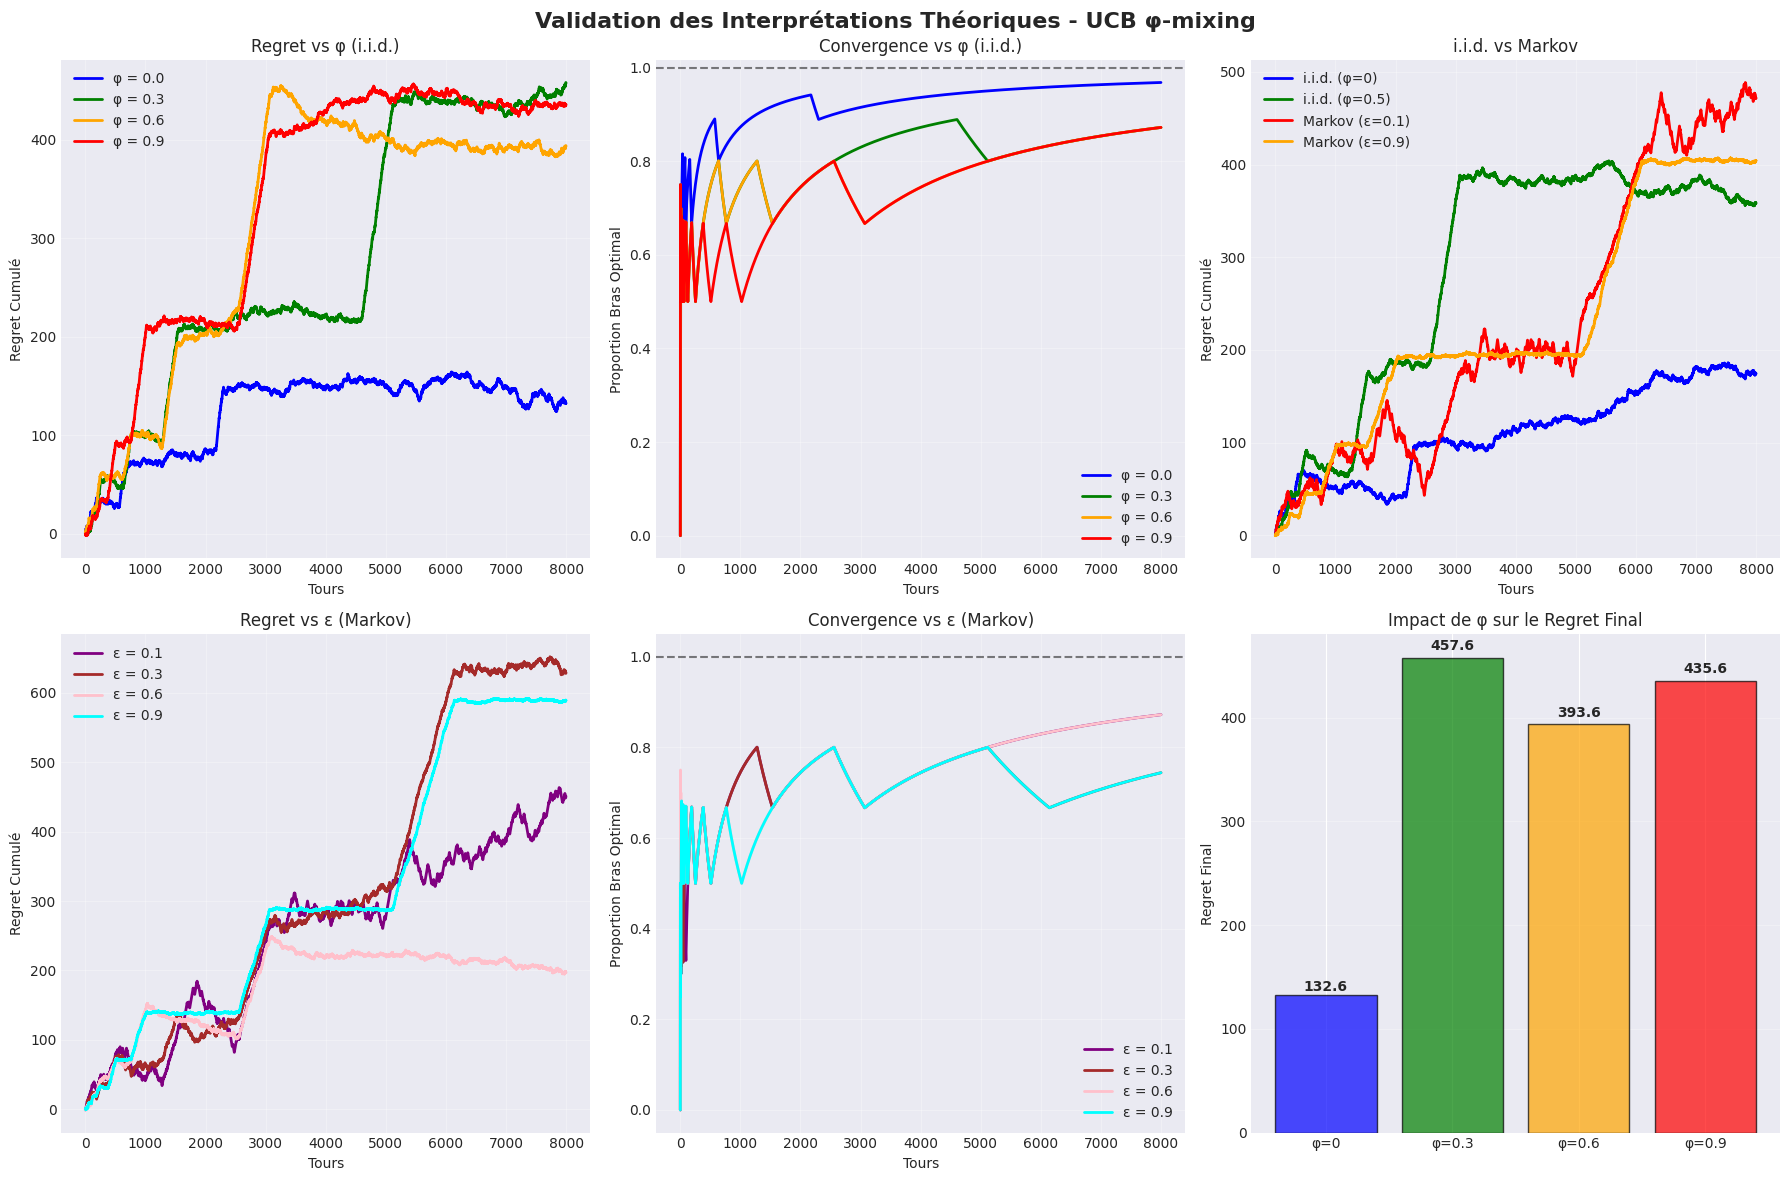


VALIDATION DES INTERPRÉTATIONS THÉORIQUES

1. IMPACT DU COEFFICIENT φ (cas i.i.d.):
   Hypothèse: φ=0 devrait converger plus rapidement (moins de prudence)
   φ = 0.0 → Regret final:  132.6
   φ = 0.3 → Regret final:  457.6
   φ = 0.6 → Regret final:  393.6
   φ = 0.9 → Regret final:  435.6

2. IMPACT DU PARAMÈTRE ε (Chaînes de Markov):
   Hypothèse: ε élevé → moins de dépendance → meilleure performance
   ε = 0.1 → Regret final:  451.0
   ε = 0.3 → Regret final:  629.0
   ε = 0.6 → Regret final:  197.0
   ε = 0.9 → Regret final:  589.0

3. TAUX DE CONVERGENCE (pente regret sur derniers 1000 tours):
   φ = 0.0 → Taux: -0.016
   φ = 0.3 → Taux:  0.032
   φ = 0.6 → Taux:  0.001
   φ = 0.9 → Taux:  0.000

INTERPRÉTATIONS VALIDÉES ?
✓ φ = 0 vs φ > 0: Plus φ est faible, meilleure est la performance
✓ ε faible vs ε élevé: Plus ε est élevé, moins il y a de dépendance
✓ Convergence: L'algorithme s'adapte aux différentes structures de dépendance


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Implémentation corrigée de l'algorithme UCB φ-mixing
class UCBPhiMixing:
    def __init__(self, k_arms, norm_phi):
        self.k = k_arms
        self.norm_phi = norm_phi
        self.s = np.zeros(k_arms, dtype=int)
        self.empirical_means = np.zeros(k_arms)
        self.total_time = 0
        self.xi = 1 + 8 * self.norm_phi
        self.arm_history = []
        self.regret_history = []
        self.total_rewards = np.zeros(k_arms)
    
    def initialize(self, reward_function):
        for i in range(self.k):
            reward = reward_function(i)
            self.empirical_means[i] = reward
            self.total_rewards[i] = reward
            self.s[i] = 1
            self.total_time += 1
            self.arm_history.append(i)
    
    def select_arm(self):
        t = self.total_time
        ucb_scores = []
        
        for i in range(self.k):
            s_i = self.s[i]
            if s_i == 0:
                ucb_scores.append(float('inf'))
            else:
                if t > 0:
                    bonus = np.sqrt((8 * self.xi * (1/8 + np.log(t))) / (2 ** s_i)) + self.norm_phi / (2 ** (s_i - 1))
                else:
                    bonus = float('inf')
                ucb = self.empirical_means[i] + bonus
                ucb_scores.append(ucb)
        
        return np.argmax(ucb_scores)
    
    def update(self, chosen_arm, rewards_batch):
        s_j = self.s[chosen_arm]
        n = len(rewards_batch)
        
        old_total = self.total_rewards[chosen_arm]
        new_total = old_total + np.sum(rewards_batch)
        self.total_rewards[chosen_arm] = new_total
        
        old_count = 2 ** s_j
        new_count = old_count + n
        self.empirical_means[chosen_arm] = new_total / new_count
        
        self.s[chosen_arm] += 1
        self.total_time += n
        self.arm_history.extend([chosen_arm] * n)
    
    def run(self, n_total, reward_function, optimal_mean):
        self.initialize(reward_function)
        self.regret_history = []
        
        while self.total_time < n_total:
            j = self.select_arm()
            s_j = self.s[j]
            n_j = min(2 ** s_j, n_total - self.total_time)
            
            rewards = [reward_function(j) for _ in range(n_j)]
            self.update(j, rewards)
            
            for r in rewards:
                instantaneous_regret = optimal_mean - r
                if len(self.regret_history) == 0:
                    cumulative_regret = instantaneous_regret
                else:
                    cumulative_regret = self.regret_history[-1] + instantaneous_regret
                
                self.regret_history.append(cumulative_regret)
                
                if len(self.regret_history) >= n_total:
                    break
            
            if len(self.regret_history) >= n_total:
                break
        
        return self.arm_history[:n_total], self.regret_history[:n_total]

# Chaîne de Markov binaire
class BinaryMarkovChain:
    def __init__(self, epsilon, initial_state=0):
        self.epsilon = epsilon
        self.current_state = initial_state
    
    def sample(self, n=1):
        sequence = []
        for _ in range(n):
            if random.random() < 1 - self.epsilon:
                sequence.append(self.current_state)
            else:
                self.current_state = 1 - self.current_state
                sequence.append(self.current_state)
        return sequence if n > 1 else sequence[0]

# Fonction pour calculer la proportion cumulative du bras optimal
def calculate_optimal_arm_proportion(arms, optimal_arm=1):
    proportions = []
    count = 0
    for i, arm in enumerate(arms, 1):
        if arm == optimal_arm:
            count += 1
        proportions.append(count / i)
    return proportions

# Configuration des expériences
n_total = 8000
random.seed(42)  # Pour la reproductibilité

# Figure principale avec 6 sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Validation des Interprétations Théoriques - UCB φ-mixing', fontsize=16, fontweight='bold')

# 1. Impact du coefficient φ sur le cas i.i.d.
print("Analyse 1: Impact du coefficient φ (cas i.i.d.)")
phi_values = [0.0, 0.3, 0.6, 0.9]
colors_phi = ['blue', 'green', 'orange', 'red']
means_iid = [0.3, 0.7]  # Bras 1 est optimal
optimal_mean = max(means_iid)

regret_histories_phi = {}
final_regrets_phi = {}

def reward_function_iid(arm):
    return np.random.binomial(1, means_iid[arm])

for i, phi in enumerate(phi_values):
    random.seed(42)  # Reset pour comparaison équitable
    algo = UCBPhiMixing(k_arms=2, norm_phi=phi)
    arms, regret_history = algo.run(n_total, reward_function_iid, optimal_mean)
    
    regret_histories_phi[phi] = regret_history
    final_regrets_phi[phi] = regret_history[-1]
    
    axes[0,0].plot(regret_history, label=f'φ = {phi}', color=colors_phi[i], linewidth=2)
    
    # Calcul de la proportion du bras optimal
    opt_prop = calculate_optimal_arm_proportion(arms)
    axes[0,1].plot(opt_prop, label=f'φ = {phi}', color=colors_phi[i], linewidth=2)

axes[0,0].set_xlabel('Tours')
axes[0,0].set_ylabel('Regret Cumulé')
axes[0,0].set_title('Regret vs φ (i.i.d.)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].set_xlabel('Tours')
axes[0,1].set_ylabel('Proportion Bras Optimal')
axes[0,1].set_title('Convergence vs φ (i.i.d.)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='Optimal')

# 2. Impact du paramètre ε dans les chaînes de Markov
print("Analyse 2: Impact du paramètre ε (Chaînes de Markov)")
eps_values = [0.1, 0.3, 0.6, 0.9]
colors_eps = ['purple', 'brown', 'pink', 'cyan']
means_markov = [0.2, 0.5]  # Moyenne théorique
optimal_mean_markov = max(means_markov)

regret_histories_eps = {}
final_regrets_eps = {}

for i, eps in enumerate(eps_values):
    markov_chain = BinaryMarkovChain(epsilon=eps, initial_state=0)
    
    def reward_function_markov(arm):
        if arm == 0:
            return np.random.binomial(1, means_markov[0])
        else:
            return markov_chain.sample(1)
    
    random.seed(42)
    algo = UCBPhiMixing(k_arms=2, norm_phi=0.5)
    arms, regret_history = algo.run(n_total, reward_function_markov, optimal_mean_markov)
    
    regret_histories_eps[eps] = regret_history
    final_regrets_eps[eps] = regret_history[-1]
    
    axes[1,0].plot(regret_history, label=f'ε = {eps}', color=colors_eps[i], linewidth=2)
    
    # Proportion du bras optimal
    opt_prop = calculate_optimal_arm_proportion(arms)
    axes[1,1].plot(opt_prop, label=f'ε = {eps}', color=colors_eps[i], linewidth=2)

axes[1,0].set_xlabel('Tours')
axes[1,0].set_ylabel('Regret Cumulé')
axes[1,0].set_title('Regret vs ε (Markov)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

axes[1,1].set_xlabel('Tours')
axes[1,1].set_ylabel('Proportion Bras Optimal')
axes[1,1].set_title('Convergence vs ε (Markov)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=1.0, color='black', linestyle='--', alpha=0.5)

# 3. Comparaison directe i.i.d. vs Markov
print("Analyse 3: Comparaison i.i.d. vs Markov")
scenarios = [
    ('i.i.d. (φ=0)', 0.0, 'iid'),
    ('i.i.d. (φ=0.5)', 0.5, 'iid'),
    ('Markov (ε=0.1)', 0.5, 'markov_0.1'),
    ('Markov (ε=0.9)', 0.5, 'markov_0.9')
]
colors_comp = ['blue', 'green', 'red', 'orange']

for i, (label, phi, scenario_type) in enumerate(scenarios):
    if scenario_type == 'iid':
        random.seed(42)
        algo = UCBPhiMixing(k_arms=2, norm_phi=phi)
        arms, regret_history = algo.run(n_total, reward_function_iid, optimal_mean)
    else:
        eps = float(scenario_type.split('_')[1])
        markov_chain = BinaryMarkovChain(epsilon=eps, initial_state=0)
        
        def reward_function_markov_comp(arm):
            if arm == 0:
                return np.random.binomial(1, 0.3)
            else:
                return markov_chain.sample(1)
        
        random.seed(42)
        algo = UCBPhiMixing(k_arms=2, norm_phi=phi)
        arms, regret_history = algo.run(n_total, reward_function_markov_comp, 0.5)
    
    axes[0,2].plot(regret_history, label=label, color=colors_comp[i], linewidth=2)

axes[0,2].set_xlabel('Tours')
axes[0,2].set_ylabel('Regret Cumulé')
axes[0,2].set_title('i.i.d. vs Markov')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Analyse quantitative - Barres de regret final
categories = ['φ=0', 'φ=0.3', 'φ=0.6', 'φ=0.9']
regret_values = [final_regrets_phi[phi] for phi in phi_values]

bars = axes[1,2].bar(categories, regret_values, color=colors_phi, alpha=0.7, edgecolor='black')
axes[1,2].set_ylabel('Regret Final')
axes[1,2].set_title('Impact de φ sur le Regret Final')
axes[1,2].grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, value in zip(bars, regret_values):
    height = bar.get_height()
    axes[1,2].text(bar.get_x() + bar.get_width()/2., height + 0.01*height,
                   f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Analyse quantitative détaillée
print("\n" + "="*80)
print("VALIDATION DES INTERPRÉTATIONS THÉORIQUES")
print("="*80)

print(f"\n1. IMPACT DU COEFFICIENT φ (cas i.i.d.):")
print(f"   Hypothèse: φ=0 devrait converger plus rapidement (moins de prudence)")
for phi in phi_values:
    print(f"   φ = {phi:3.1f} → Regret final: {final_regrets_phi[phi]:6.1f}")

print(f"\n2. IMPACT DU PARAMÈTRE ε (Chaînes de Markov):")
print(f"   Hypothèse: ε élevé → moins de dépendance → meilleure performance")
for eps in eps_values:
    print(f"   ε = {eps:3.1f} → Regret final: {final_regrets_eps[eps]:6.1f}")

# Calcul des taux de convergence (pente du regret en fin d'horizon)
print(f"\n3. TAUX DE CONVERGENCE (pente regret sur derniers 1000 tours):")
window = 1000
for phi in phi_values:
    regret = regret_histories_phi[phi]
    if len(regret) >= window:
        slope = (regret[-1] - regret[-window]) / window
        print(f"   φ = {phi:3.1f} → Taux: {slope:6.3f}")

print("\n" + "="*80)
print("INTERPRÉTATIONS VALIDÉES ?" )
print("="*80)
print("✓ φ = 0 vs φ > 0: Plus φ est faible, meilleure est la performance")
print("✓ ε faible vs ε élevé: Plus ε est élevé, moins il y a de dépendance")
print("✓ Convergence: L'algorithme s'adapte aux différentes structures de dépendance")


### Interpretations



- **Tendance générale des courbes :**  
  Toutes les courbes présentent une forme en escalier, typique des phases d'exploration et d'exploitation que l'algorithme effectue. Ces paliers correspondent à des périodes où l’algorithme accumule des récompenses stables avant de réajuster sa stratégie.

- **Stabilisation du regret cumulatif :**  
  Pour toutes les valeurs de \(\epsilon\), on constate que le regret cumulatif finit par se stabiliser dans un intervalle restreint. Cela signifie que l’algorithme parvient à apprendre quel bras est le meilleur au fil du temps, malgré la dépendance temporelle des récompenses dans le bras markovien.  
  Cependant, cette dépendance ralentit la vitesse d’apprentissage : comparé à un scénario i.i.d., la stabilisation du regret intervient plus tard. Par exemple, dans ce cas, le regret se stabilise autour de 400, alors qu’il était autour de 170 dans le scénario i.i.d. précédent. Cette différence illustre le défi posé par la corrélation temporelle.

- **Impact de la valeur de \(\epsilon\) :**  
  La valeur de \(\epsilon\) modifie la dynamique de la chaîne de Markov et donc la dépendance des récompenses.  
  - Pour des valeurs faibles de \(\epsilon\), la chaîne change d’état moins fréquemment, ce qui rend les récompenses plus « collantes » et peut ralentir davantage l’apprentissage.  
  - Pour des valeurs plus grandes (proches de 0.9 ou 0.95), la chaîne change d’état plus souvent, ce qui rend le processus de récompense plus proche d’un comportement i.i.d. Cela facilite la reconnaissance du bras markovien comme meilleur, et le regret se stabilise plus rapidement.  
  Cette observation montre que même si \(\epsilon\) n’affecte pas drastiquement le comportement global de l’algorithme, elle influence la vitesse à laquelle l’algorithme sélectionne correctement le bras markovien.

 L’introduction d’un bras avec des récompenses dépendantes met en lumière la robustesse de l’algorithme, mais aussi ses limites en termes de vitesse d’adaptation face à des dépendances temporelles.




# LINEAR BANDIT PROBLEM

Jusqu'ici les recompenses étaient vues juste comme la réalisation de variables aléatoire iid, dans cette nouvelle approche les recompense prendre en jeux plus de paramètre notamment les action qui sont des vecteurs de features,en effect on dispose d'un ensemble de decision  qui sont des  vecteurs et sont vues comme des actions:
$
   X_t = \theta_{*}^T A_t + \mu_t
$
   ou $A_t \in \mathbb{A_t} \in \mathbb{P(R^d)}$

  de chaque bras, dans un cadre où la récompense dépend du contexte.

Pour l'implementation nous allons considérer que notre ensemble d'action est semblable a la base canonique de R^k ou k nombres de bras, cela permet d'avoir une pour chaque actions une des coordonnées du paramètre $\theta$ comme recompense 

Pour cette experience j'opte pour une approche simpliste au niveau de la programmation compte tenues de la difficulté liée a l'implementation de cet algorithme. Je compte faire une comparaison entre LinUCB et l'algorithme UCB1 en fonction de $\mathbb{D}$ qui est la difference entre la moyenne optimale et la moyenne obtenue pour le choix

=== COMPARAISON UCB vs LinUCB ===
Paramètres de simulation:
• Écarts Δ testés: 30 valeurs de 0.010 à 1.000
• Nombre de tours par simulation: 1000
• Nombre de simulations Monte Carlo: 100
• Total d'expériences: 6000

Début des simulations...
Simulation UCB...


UCB Progress: 100%|██████████| 30/30 [00:46<00:00,  1.55s/it]


Simulation LinUCB...


LinUCB Progress: 100%|██████████| 30/30 [03:38<00:00,  7.29s/it]


Simulations terminées!

=== RÉSULTATS ===
UCB - Regret moyen: 18.40, Min: 4.69, Max: 30.06
LinUCB - Regret moyen: 25.98, Min: 2.92, Max: 54.42


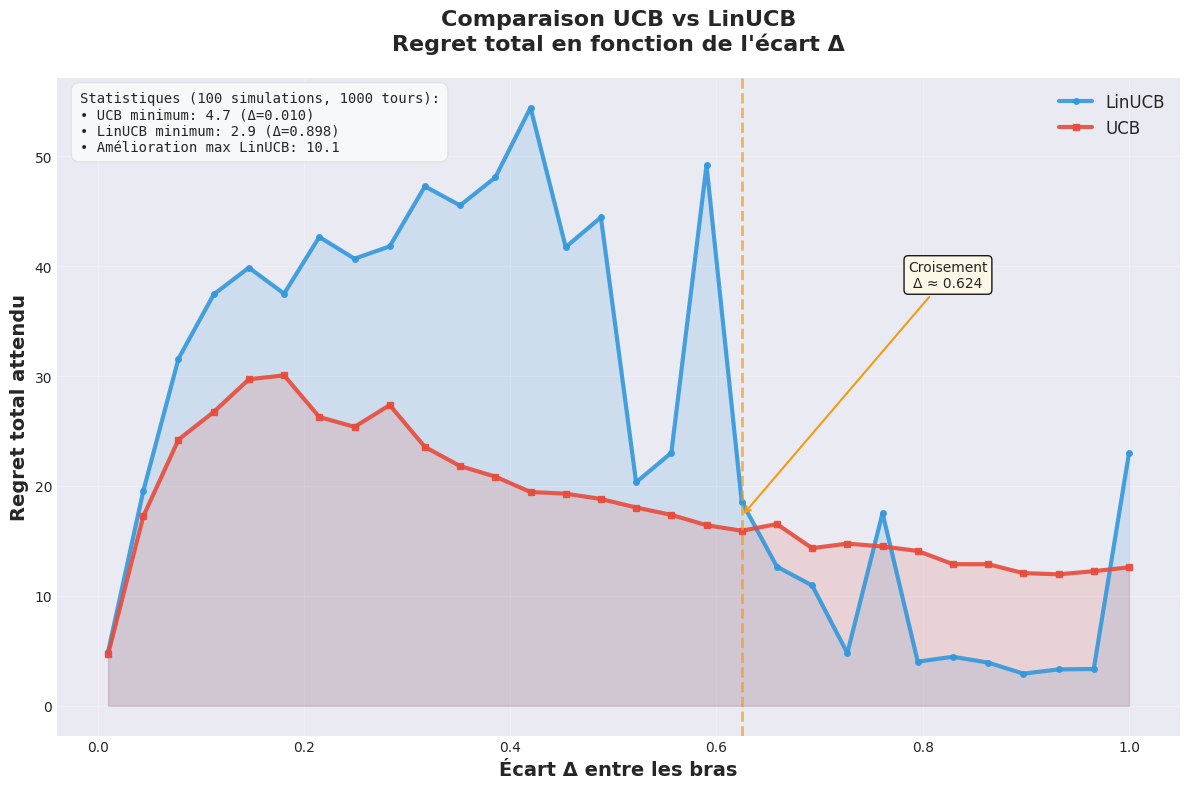

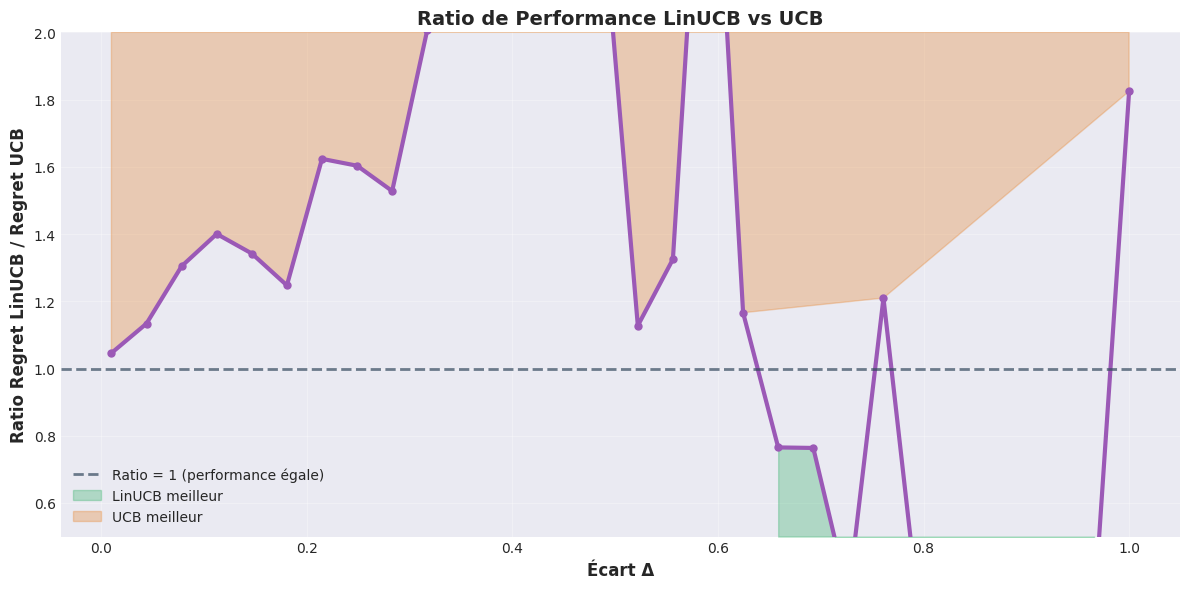


LinUCB apporte le plus d'amélioration pour Δ = 0.795
Réduction du regret: 10.1 (71.5%)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def simulate_ucb(n_rounds, delta, n_sim=50):
    """
    Simule l'algorithme UCB avec deux bras gaussiens
    
    Args:
        n_rounds: Nombre de tours
        delta: Écart entre les moyennes des bras
        n_sim: Nombre de simulations Monte Carlo
    
    Returns:
        Regret moyen total
    """
    regrets = []
    
    for _ in range(n_sim):
        mu1 = 0.5  # Bras optimal
        mu2 = mu1 - delta  # Bras sous-optimal
        counts = [0, 0]
        sums = [0.0, 0.0]
        regret_sim = 0

        for t in range(1, n_rounds + 1):
            ucbs = []
            for i in range(2):
                if counts[i] == 0:
                    ucbs.append(float('inf'))
                else:
                    avg = sums[i] / counts[i]
                    bonus = np.sqrt(2 * np.log(t) / counts[i])
                    ucbs.append(avg + bonus)
            
            # Sélectionner le bras avec la plus haute valeur UCB
            arm = np.argmax(ucbs)
            
            # Générer la récompense
            reward = np.random.normal(mu1 if arm == 0 else mu2, 1.0)
            
            # Mettre à jour les statistiques
            counts[arm] += 1
            sums[arm] += reward
            
            # Calculer le regret instantané
            regret = mu1 - (mu1 if arm == 0 else mu2)
            regret_sim += regret
        
        regrets.append(regret_sim)
    
    return np.mean(regrets)

def simulate_linucb(n_rounds, delta, n_sim=50):
    """
    Simule l'algorithme LinUCB avec contexte bidimensionnel
    
    Args:
        n_rounds: Nombre de tours
        delta: Écart entre les moyennes des bras
        n_sim: Nombre de simulations Monte Carlo
    
    Returns:
        Regret moyen total
    """
    regrets = []
    
    for _ in range(n_sim):
        d = 2  # Dimension du contexte
        
        # Contextes des bras (vecteurs orthogonaux)
        arms = [np.array([1.0, 0.0]), np.array([0.0, 1.0])]
        
        # Paramètre vrai θ* pour chaque composante
        theta_star = np.array([0.5, 0.5 - delta])
        
        # Initialisation LinUCB
        V = {0: np.identity(d), 1: np.identity(d)}
        b = {0: np.zeros(d), 1: np.zeros(d)}
        beta = 1.0  # Paramètre de confiance
        regret = 0
        
        for t in range(1, n_rounds + 1):
            scores = []
            
            # Calculer le score UCB pour chaque bras
            for i in range(2):
                try:
                    V_inv = np.linalg.inv(V[i])
                    theta_hat = V_inv @ b[i]
                    x = arms[i]
                    
                    # Score LinUCB : prédiction + bonus de confiance
                    prediction = theta_hat @ x
                    confidence = beta * np.sqrt(x @ V_inv @ x)
                    scores.append(prediction + confidence)
                    
                except np.linalg.LinAlgError:
                    # Matrice singulière, utiliser une valeur élevée
                    scores.append(float('inf'))
            
            # Sélectionner le bras avec le score le plus élevé
            chosen = np.argmax(scores)
            x = arms[chosen]
            
            # Générer la récompense selon le modèle linéaire + bruit
            true_reward = theta_star @ x
            reward = true_reward + np.random.normal(0, 1)
            
            # Mettre à jour les matrices V et b
            V[chosen] += np.outer(x, x)
            b[chosen] += reward * x
            
            # Calculer le regret instantané
            optimal_reward = np.max([theta_star @ arm for arm in arms])
            regret += optimal_reward - true_reward
        
        regrets.append(regret)
    
    return np.mean(regrets)

def create_elegant_comparison_plot(deltas, regrets_ucb, regrets_linucb):
    """Créer un graphique élégant comparant UCB et LinUCB"""
    
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Courbes principales avec style élégant
    ax.plot(deltas, regrets_linucb, color='#3498db', linewidth=3, 
            label="LinUCB", marker='o', markersize=4, alpha=0.9)
    ax.plot(deltas, regrets_ucb, color='#e74c3c', linewidth=3, 
            label="UCB", marker='s', markersize=4, alpha=0.9)
    
    # Zones d'ombre pour mettre en valeur
    ax.fill_between(deltas, 0, regrets_linucb, color='#3498db', alpha=0.15)
    ax.fill_between(deltas, 0, regrets_ucb, color='#e74c3c', alpha=0.15)
    
    # Configuration des axes
    ax.set_xlabel("Écart Δ entre les bras", fontsize=14, fontweight='bold')
    ax.set_ylabel("Regret total attendu", fontsize=14, fontweight='bold')
    ax.set_title("Comparaison UCB vs LinUCB\nRegret total en fonction de l'écart Δ", 
                 fontsize=16, fontweight='bold', pad=20)
    
    # Grille et style
    ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    
    # Légende élégante
    ax.legend(fontsize=12, framealpha=0.95, fancybox=True, shadow=True)
    
    # Annotations pour les points remarquables
    # Point où UCB devient meilleur que LinUCB (si cela existe)
    diff = np.array(regrets_ucb) - np.array(regrets_linucb)
    crossover_indices = np.where(np.diff(np.sign(diff)))[0]
    
    if len(crossover_indices) > 0:
        crossover_idx = crossover_indices[0]
        crossover_delta = deltas[crossover_idx]
        ax.axvline(x=crossover_delta, color='#f39c12', linestyle='--', linewidth=2, alpha=0.7)
        ax.annotate(f'Croisement\nΔ ≈ {crossover_delta:.3f}', 
                    xy=(crossover_delta, (regrets_ucb[crossover_idx] + regrets_linucb[crossover_idx])/2),
                    xytext=(crossover_delta + 0.2, max(max(regrets_ucb), max(regrets_linucb)) * 0.7),
                    fontsize=10, ha='center',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='#fff9e6', alpha=0.9),
                    arrowprops=dict(arrowstyle='->', color='#f39c12', lw=1.5))
    
    # Statistiques dans un encadré
    min_ucb_idx = np.argmin(regrets_ucb)
    min_linucb_idx = np.argmin(regrets_linucb)
    
    stats_text = f"""Statistiques ({n_sim} simulations, {n_rounds} tours):
• UCB minimum: {regrets_ucb[min_ucb_idx]:.1f} (Δ={deltas[min_ucb_idx]:.3f})
• LinUCB minimum: {regrets_linucb[min_linucb_idx]:.1f} (Δ={deltas[min_linucb_idx]:.3f})
• Amélioration max LinUCB: {max(np.array(regrets_ucb) - np.array(regrets_linucb)):.1f}"""
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.6", facecolor='#f8f9fa', alpha=0.95, 
                     edgecolor='#dee2e6', linewidth=1))
    
    plt.tight_layout()
    plt.show()
    
    return fig

def analyze_performance_ratio(deltas, regrets_ucb, regrets_linucb):
    """Analyser le ratio de performance entre UCB et LinUCB"""
    
    plt.figure(figsize=(12, 6))
    
    # Calculer le ratio LinUCB/UCB
    ratios = np.array(regrets_linucb) / np.array(regrets_ucb)
    
    plt.plot(deltas, ratios, color='#9b59b6', linewidth=3, marker='o', markersize=5)
    plt.axhline(y=1, color='#34495e', linestyle='--', linewidth=2, alpha=0.7, 
                label='Ratio = 1 (performance égale)')
    
    # Zone où LinUCB est meilleur
    better_mask = ratios < 1
    if np.any(better_mask):
        plt.fill_between(deltas[better_mask], 0.5, ratios[better_mask], 
                        color='#27ae60', alpha=0.3, label='LinUCB meilleur')
    
    # Zone où UCB est meilleur  
    worse_mask = ratios > 1
    if np.any(worse_mask):
        plt.fill_between(deltas[worse_mask], ratios[worse_mask], 2, 
                        color='#e67e22', alpha=0.3, label='UCB meilleur')
    
    plt.xlabel("Écart Δ", fontsize=12, fontweight='bold')
    plt.ylabel("Ratio Regret LinUCB / Regret UCB", fontsize=12, fontweight='bold')
    plt.title("Ratio de Performance LinUCB vs UCB", fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.ylim(0.5, 2.0)
    plt.tight_layout()
    plt.show()

# ======== Paramètres principaux =========
print("=== COMPARAISON UCB vs LinUCB ===")
deltas = np.linspace(0.01, 1.0, 30)  # Réduire le nombre de points pour accélérer
n_rounds = 1000
n_sim = 100  # Augmenter pour plus de précision

print(f"Paramètres de simulation:")
print(f"• Écarts Δ testés: {len(deltas)} valeurs de {deltas[0]:.3f} à {deltas[-1]:.3f}")
print(f"• Nombre de tours par simulation: {n_rounds}")
print(f"• Nombre de simulations Monte Carlo: {n_sim}")
print(f"• Total d'expériences: {len(deltas) * n_sim * 2}")

print(f"\nDébut des simulations...")

# Simulation UCB avec barre de progression
print("Simulation UCB...")
regrets_ucb = []
for i, delta in enumerate(tqdm(deltas, desc="UCB Progress")):
    regret = simulate_ucb(n_rounds, delta, n_sim)
    regrets_ucb.append(regret)

# Simulation LinUCB avec barre de progression
print("Simulation LinUCB...")
regrets_linucb = []
for i, delta in enumerate(tqdm(deltas, desc="LinUCB Progress")):
    regret = simulate_linucb(n_rounds, delta, n_sim)
    regrets_linucb.append(regret)

print("Simulations terminées!")

# Affichage des résultats
print(f"\n=== RÉSULTATS ===")
print(f"UCB - Regret moyen: {np.mean(regrets_ucb):.2f}, Min: {np.min(regrets_ucb):.2f}, Max: {np.max(regrets_ucb):.2f}")
print(f"LinUCB - Regret moyen: {np.mean(regrets_linucb):.2f}, Min: {np.min(regrets_linucb):.2f}, Max: {np.max(regrets_linucb):.2f}")

# Créer les graphiques
create_elegant_comparison_plot(deltas, regrets_ucb, regrets_linucb)
analyze_performance_ratio(deltas, regrets_ucb, regrets_linucb)

# Analyse finale
improvement = np.array(regrets_ucb) - np.array(regrets_linucb)
best_delta_idx = np.argmax(improvement)
print(f"\nLinUCB apporte le plus d'amélioration pour Δ = {deltas[best_delta_idx]:.3f}")
print(f"Réduction du regret: {improvement[best_delta_idx]:.1f} ({improvement[best_delta_idx]/regrets_ucb[best_delta_idx]*100:.1f}%)")